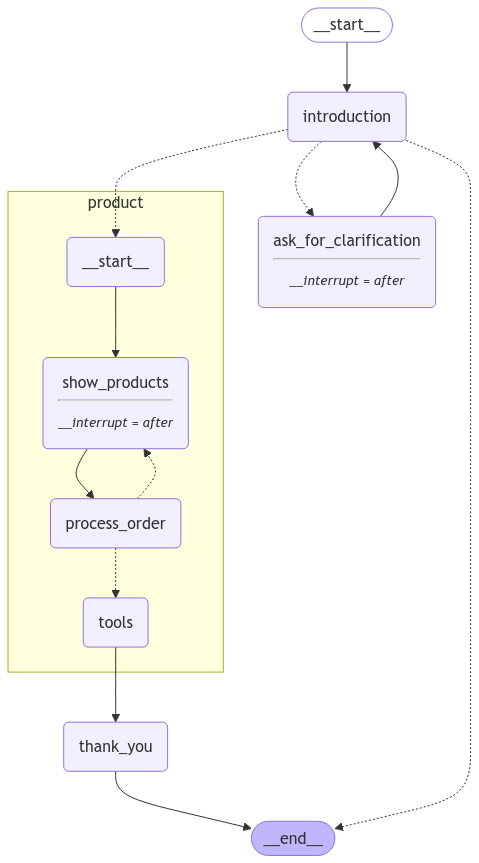

In [1]:
from iris.graphs.introduction.graph import graph
from IPython.display import Image, display

display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [2]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "234"}}
message = HumanMessage("which products do you have?")

for event in graph.stream({"messages": [message]}, config, stream_mode="values", subgraphs=True):
    _, messages = event
    last = messages["messages"][-1]
last.pretty_print()

================================== Ai Message ==================================

We have the following products available:

1. **Vegan Pancakes**: A delicious stack of pancakes topped with fresh strawberries, blueberries, and a drizzle of syrup. ($12.00)
2. **Cheese Table**: An elegant cheese board featuring a variety of sliced cheeses, crackers, fresh grapes, nuts, olives, dried fruits, and flavorful dips. ($18.50)
3. **Orange Juice**: Freshly squeezed orange juice, vibrant and packed with natural flavor. (500 ml, $2.90)
4. **Chocolate box**: Assorted premium chocolates, crafted with rich flavors and elegant designs. ($15.00)

Which one of these products catches your eye?


In [4]:
state = graph.get_state(config, subgraphs=True)
subgraph_state = state.tasks[0].state
print(state.next)
print(subgraph_state.next)

('product',)
('process_order',)


In [12]:
subgraph_state.values["products"]

[Product(id='17f67ca3-bc40-4d4e-a916-39af2008a361', name='Vegan Pancakes', price=12.0, description='Fluffy and delicious stack of pancakes topped with fresh strawberries, blueberries, and a drizzle of syrup – perfect for breakfast or brunch. A delightful treat for any time of the day!', image='7ac58c7a-fd4c-4a86-b137-f9351378ed9b'),
 Product(id='2c1c16aa-61a2-42d5-8e4c-48e77018227f', name='Cheese Table', price=18.5, description='Elegant cheese board featuring a variety of sliced cheeses, crackers, fresh grapes, nuts, olives, dried fruits, and flavorful dips. Perfect for entertaining guests or enjoying a gourmet snack.', image='bee80ce2-342d-4d45-8125-a6ce279b96d9'),
 Product(id='3425e579-cf5b-492d-be69-0fb7f45b14da', name='Orange Juice', price=2.9, description='Freshly squeezed orange juice, vibrant and packed with natural flavor. 500 ml', image='4ad11ba2-1540-4e0b-973a-dc291f8b98bc'),
 Product(id='8bbad801-be19-48b0-a1ee-98571c6bbada', name='Chocolate box', price=15.0, description='As

In [13]:
parent_graph_state_before_subgraph = next(
    h for h in graph.get_state_history(config) if h.next == ("product",)
)
subgraph_state_before_model_node = next(
    h
    for h in graph.get_state_history(parent_graph_state_before_subgraph.tasks[0].state)
    if h.next == ("process_order",)
)

subgraph_state_before_model_node.next

('process_order',)

In [14]:
state = graph.get_state(config, subgraphs=True)
state.tasks[0].state.values["messages"]

[HumanMessage(content='which products do you have?', additional_kwargs={}, response_metadata={}, id='1a5bbb5c-a408-4a80-b804-e70e770e9424'),
 AIMessage(content='We have the following products available:\n\n1. **Vegan Pancakes**: A delicious stack of pancakes topped with fresh strawberries, blueberries, and a drizzle of syrup. ($12.00)\n2. **Cheese Table**: An elegant cheese board featuring a variety of sliced cheeses, crackers, fresh grapes, nuts, olives, dried fruits, and flavorful dips. ($18.50)\n3. **Orange Juice**: Freshly squeezed orange juice, vibrant and packed with natural flavor. (500 ml, $2.90)\n4. **Chocolate box**: Assorted premium chocolates, crafted with rich flavors and elegant designs. ($15.00)\n\nWhich one of these products catches your eye?', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'usage': {'completion_tokens': 141, 'completion_tokens_after_first_per_sec': 575.3463968011193, 'completion_tokens_after_first_per_sec_first_ten': 632.210732031851

In [15]:
graph.update_state(
    state.tasks[0].state.config,
    {"messages": [HumanMessage(content="give me 3 cheese tables and 2 orange juices please!")]},
    # as_node="product"
)


{'configurable': {'thread_id': '234',
  'checkpoint_ns': 'product:cf488a11-7290-d2bc-5eda-a2a49ddd110c',
  'checkpoint_id': '1efab173-76d9-67b0-8002-e393fa7176fe',
  'checkpoint_map': {'': '1efab171-5540-6ed4-8001-d8377cfdb95c',
   'product:cf488a11-7290-d2bc-5eda-a2a49ddd110c': '1efab173-76d9-67b0-8002-e393fa7176fe'}}}

In [16]:
for event in graph.stream(None, config, stream_mode="values", subgraphs=True):
    _, messages = event
    messages=messages["messages"]
    message.pretty_print()

================================ Human Message =================================

which products do you have?
================================ Human Message =================================

which products do you have?
================================ Human Message =================================

which products do you have?
================================ Human Message =================================

which products do you have?
================================ Human Message =================================

which products do you have?
Entra a thank you
================================ Human Message =================================

which products do you have?


In [45]:
state=graph.get_state(config)
state.next

()

In [47]:
history = graph.get_state_history(config)
for h in history:
    print(h.next)
    for message in h.values["messages"]:
        message.pretty_print()
    print("-------------------------------------")

()
================================ Human Message =================================

Hola como vas
================================== Ai Message ==================================

¡Hola! Todo bien, gracias. ¿En qué puedo ayudarte hoy? ¿Estás interesado en comprar un producto o necesitas devolver uno?
================================ Human Message =================================

que productos tienes?
================================== Ai Message ==================================

Claro, aquí tienes una lista de los productos disponibles:

1. **Vegan breakfast**: Desayuno vegano que incluye pan, fruta y chocolate caliente. Precio: $12.0

2. **Cheese Table**: Variedad de quesos, porción para tres personas. Precio: $18.5

3. **Orange Juice**: 250 ml de jugo de naranja. Precio: $2.9

4. **Chocolate box**: Caja de chocolate blanco de 10 unidades. Precio: $15.0

Si necesitas más información sobre alguno de ellos o deseas realizar una compra, házmelo saber.
===============================

In [8]:
for event in graph.stream(None, config, stream_mode="values", subgraphs=True):
    _, messages = event
    last = messages["messages"][-1]
last.pretty_print()

{'products': [{'products_id': '3425e579-cf5b-492d-be69-0fb7f45b14da', 'quantity': 3}, {'products_id': '17f67ca3-bc40-4d4e-a916-39af2008a361', 'quantity': 2}]}
================================= Tool Message =================================
Name: create_order

<Response [200]>


In [32]:
state=graph.get_state(config, subgraphs=True)
state.tasks

()

In [73]:
state.values

{'messages': [HumanMessage(content='Hola como vas', additional_kwargs={}, response_metadata={}, id='d9aa6274-60ce-4be6-b82f-1fb99704f32e'),
  AIMessage(content='Hola, muy bien, gracias. ¿En qué puedo ayudarte hoy? ¿Estás interesado en comprar un producto o deseas devolver uno?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 40, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_7f6be3efb0', 'finish_reason': 'stop', 'logprobs': None}, id='run-11951b5f-fc70-4909-8254-f6fa076a541a-0', usage_metadata={'input_tokens': 40, 'output_tokens': 27, 'total_tokens': 67, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content

In [8]:
# order = state.values["order"]
# print(order.model_dump())
# from iris.services.order_service import create_order

# response= create_order(order)

In [14]:
product_graph.invoke(None, config)

{'products': [{'products_id': '3c04f90a-5afd-48bf-bfe0-20a52d93cb0c', 'quantity': 1}]}


{'messages': [HumanMessage(content='Quiero comprar una tostada', additional_kwargs={}, response_metadata={}, id='83ca7611-4677-40fa-94ef-39531e9b230d'),
  AIMessage(content='¡Claro! Tenemos las siguientes opciones disponibles:\n\n1. **Tostadas Francesas**\n   - **Precio:** 20,000.0\n   - **Descripción:** Huevo tostado con mucha mantequilla deliciosa\n\n¿Te gustaría proceder con la compra de las Tostadas Francesas?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 134, 'total_tokens': 194, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_a5d11b2ef2', 'finish_reason': 'stop', 'logprobs': None}, id='run-53d936cd-404c-4d9f-9085-ad7322f3c056-0', usage_metadata={'input_tokens': 134, 'output_tokens': 60, 'total_tokens': 194}),
  HumanMessage(content='Si', additional_kwargs={}, response_metadata={}, id='f4b2310e-cb2d-4a36-8c31-e07e520d181f')]}

In [15]:
state=product_graph.get_state(config)
state.next

()

In [16]:
print(state)

StateSnapshot(values={'messages': [HumanMessage(content='Quiero comprar una tostada', additional_kwargs={}, response_metadata={}, id='83ca7611-4677-40fa-94ef-39531e9b230d'), AIMessage(content='¡Claro! Tenemos las siguientes opciones disponibles:\n\n1. **Tostadas Francesas**\n   - **Precio:** 20,000.0\n   - **Descripción:** Huevo tostado con mucha mantequilla deliciosa\n\n¿Te gustaría proceder con la compra de las Tostadas Francesas?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 134, 'total_tokens': 194, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_a5d11b2ef2', 'finish_reason': 'stop', 'logprobs': None}, id='run-53d936cd-404c-4d9f-9085-ad7322f3c056-0', usage_metadata={'input_tokens': 134, 'output_tokens': 60, 'total_tokens': 194}), HumanMessage(content='Si', additional_kwargs={}, response_metadata={}, id='f4b2310e-cb2d-4a36-8c31-e07e520d181f')], 'p